In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures


# 0.

In [3]:
df = sns.load_dataset("mpg")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<Axes: xlabel='weight', ylabel='mpg'>

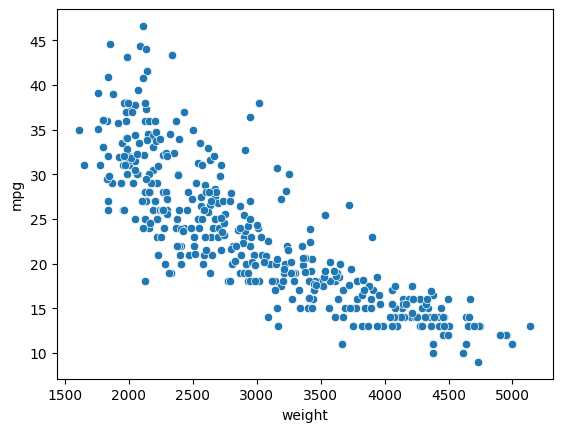

In [6]:
sns.scatterplot(x=df['weight'], y=df['mpg'])

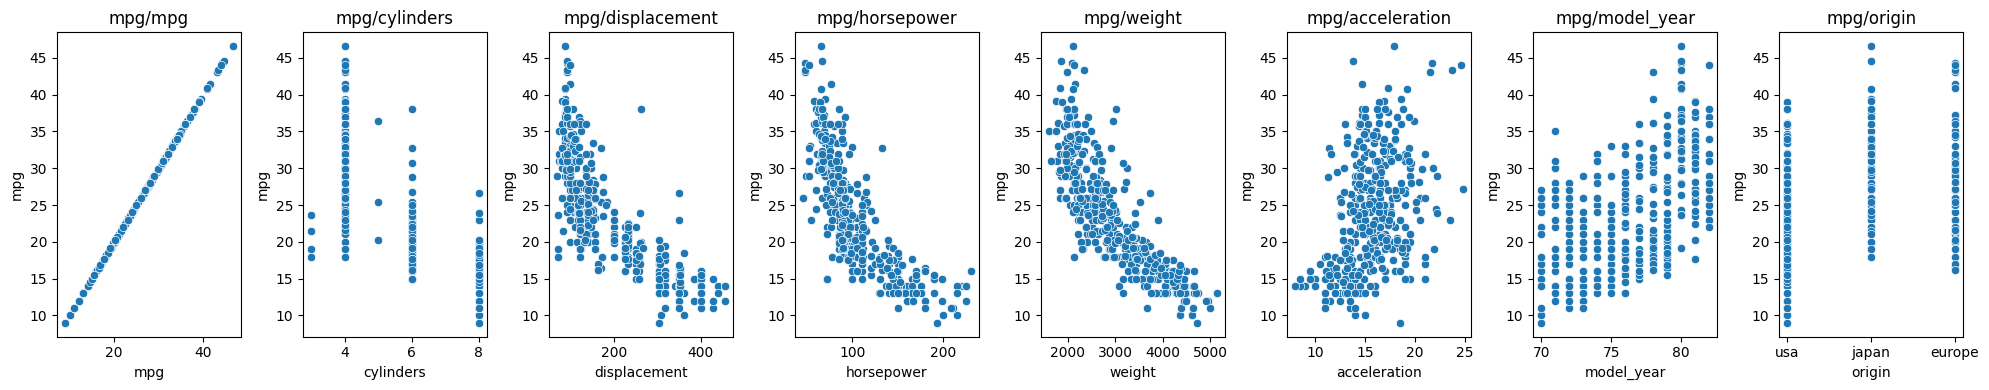

In [7]:
# re-used kokchun code from L0
number_features = df.shape[1] - 1
fig, ax = plt.subplots(1, number_features, figsize=(20, 4), dpi=100)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x=feature, y="mpg", ax=ax[i])
    ax[i].set(title=f"mpg/{feature}")

fig.tight_layout()

In [8]:
X, y = df.drop(["origin", "name", "mpg"], axis=1), df['mpg']
X.head(2), y.head(2)

(   cylinders  displacement  horsepower  weight  acceleration  model_year
 0          8         307.0       130.0    3504          12.0          70
 1          8         350.0       165.0    3693          11.5          70,
 0    18.0
 1    15.0
 Name: mpg, dtype: float64)

# 1.

In [9]:
X[X['horsepower'].isna()]

,cylinders,displacement,horsepower,weight,acceleration,model_year
32,4,98.0,NaN,2046,19.0,71
126,6,200.0,NaN,2875,17.0,74
330,4,85.0,NaN,1835,17.3,80
336,4,140.0,NaN,2905,14.3,80
354,4,100.0,NaN,2320,15.8,81
374,4,151.0,NaN,3035,20.5,82


In [10]:
# findind rows that contain NaN and removing them from both df's
X['horsepower'].isna().sum()
X.drop([32, 126, 330, 336, 354, 374], inplace=True) # all NaN rows X 
y.drop([32, 126, 330, 336, 354, 374], inplace=True) # all Nan rows y

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 6), (79, 6), (313,), (79,))

# 2 & 3

# SVD

In [13]:
def eval_regression_SVD(X_train, X_test, y_train, y_test, model):
    
    regression_model = model
    regression_model.fit(X_train, y_train)
    y_pred_SVD = regression_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred_SVD)
    mse = mean_squared_error(y_test, y_pred_SVD)
    rmse = np.sqrt(mse)

    global regression_SVD # creates the variable outside of the function
    data = {"Linear regr. SVD": [mae, mse, rmse]}
    regression_SVD = pd.DataFrame(data=data, index=['MAE', 'MSE', 'RMSE'])

    return regression_SVD

# SGD

In [14]:
def eval_regression_SGD(X_train, X_test, y_train, y_test, model):
    
    regression_model = model
    regression_model.fit(X_train, y_train)
    y_pred_SVD = regression_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred_SVD)
    mse = mean_squared_error(y_test, y_pred_SVD)
    rmse = np.sqrt(mse)

    global regression_SGD # creates the variable outside of the function
    data = {'Linear regr. SGD': [mae, mse, rmse]}
    regression_SGD = pd.DataFrame(data=data, index=['MAE', 'MSE', 'RMSE'])

    return regression_SGD

# Polynomial regression degress 1-3

In [15]:
def poly_regression(X_train, y_train, degree):
    poly = PolynomialFeatures(degree = degree, include_bias=False)

    poly_features = poly.fit_transform(X_train)
    
    regressor = LinearRegression()
    regressor.fit(poly_features, y_train)
    y_poly_pred = regressor.predict(poly_features)

    mae = mean_absolute_error(y_train, y_poly_pred)
    mse = mean_squared_error(y_train, y_poly_pred)
    rmse = np.sqrt(mae)

    data_poly = {f'Polynom. regr. deg {degree}': [mae, mse, rmse]}
    data_poly = pd.DataFrame(data=data_poly, index=['MAE', 'MSE', 'RMSE'])

    return data_poly

### Scaler

In [16]:
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

SGD_model = SGDRegressor(loss = "squared_error", learning_rate="invscaling", max_iter=10000)
LR_model = LinearRegression()

# Functions for df

In [17]:
regression_SVD = eval_regression_SVD(X_train, X_test, y_train, y_test, LR_model)
scaled_regression_SVD = eval_regression_SVD(scaled_X_train, scaled_X_test, y_train, y_test, LR_model)
regression_SGD = eval_regression_SGD(scaled_X_train, scaled_X_test, y_train, y_test, SGD_model)

poly_1_df = poly_regression(X_train, y_train, 1)
poly_2_df = poly_regression(X_train, y_train, 2)
poly_3_df = poly_regression(X_train, y_train, 3)

### Concatenating all dfs together

In [18]:
new_df = [regression_SVD, scaled_regression_SVD, regression_SGD, poly_1_df, poly_2_df, poly_3_df]
comparisson_df = pd.concat(new_df, axis=1)
comparisson_df

# polynomial är troligtvis inte korrekt, får kolla mer på det.
# Kan vara värt att göra om polynomial från scratch så inget missas
# Göra train|val|test split som i codealongen? testa det

,Linear regr. SVD,Linear regr. SVD,Linear regr. SGD,Polynom. regr. deg 1,Polynom. regr. deg 2,Polynom. regr. deg 3
MAE,2.503860,2.503860,2.563063,2.669176,1.899814,1.539188
MSE,10.502370,10.502370,11.164587,11.943343,6.928777,4.539244
RMSE,3.240736,3.240736,3.341345,1.633761,1.378338,1.240640


# 4. Further explorations(**)

In [41]:
def evaluate_poly(X_train, X_test, y_train, y_test, model):
    model = model

    model.fit_transform(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mae)

    data = {"Polynomial regression": [mae, mse, rmse]}
    data_df = pd.DataFrame(data= data, index=['MAE', 'MSE', 'RMSE'])

    return data_df